This time used a specific grib file that I know has valid forecasts. https://thredds.ucar.edu/thredds/ncss/grid/grib/NCEP/NBM/CONUS/National_Blend_CONUS_20240405_0700.grib2?var=Total_cloud_cover_surface&north=48&west=-77&east=-67&south=45&horizStride=1&time_start=2024-04-05T08:00:00Z&time_end=2024-04-13T18:00:00Z&&&accept=netcdf4-classic

In [6]:
import rasterio

In [5]:
import xarray as xr

In [2]:
import requests

In [3]:
filename = "National_Blend_CONUS_2024_04_08.gib2.nc4"
url = "https://thredds.ucar.edu/thredds/ncss/grid/grib/NCEP/NBM/CONUS/National_Blend_CONUS_20240405_1600.grib2?var=Total_cloud_cover_surface&north=57.098&west=-138.394&east=-59.022&south=19.215&horizStride=1&time=2024-04-08T18:00:00Z&&accept=netcdf4-classic"
resp = requests.get(url)
with open(filename, "wb") as f:
    f.write(resp.content)

In [7]:
dsnatblend20240405T1600_rio = xr.open_dataset("National_Blend_CONUS_2024_04_08.gib2.nc4",engine="rasterio")

In [8]:
dsnatblend20240405T1600_rio

<xarray.Dataset>
Dimensions:                                   (time4: 1, x: 2345, y: 1550)
Coordinates:
  * time4                                     (time4) object 2024-04-08 18:00:00
  * x                                         (x) float64 -3.271e+03 ... 2.68...
  * y                                         (y) float64 3.79e+03 ... -144.4
    LambertConformal_1597X2345-40p63N-98p34W  int64 ...
Data variables:
    Total_cloud_cover_surface                 (time4, y, x) float32 ...

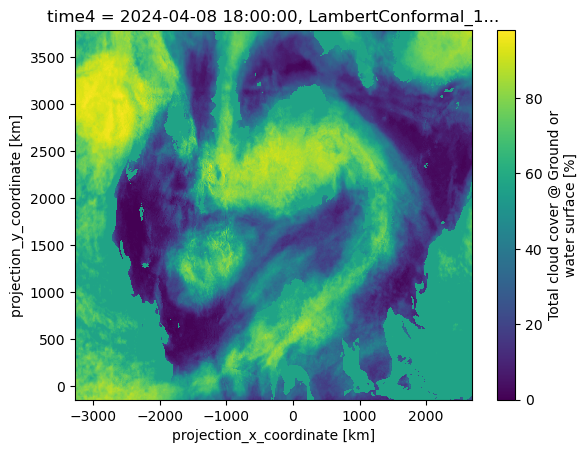

In [9]:
dsnatblend20240405T1600_rio["Total_cloud_cover_surface"].plot()

In [10]:
from rasterio import features

In [11]:
nbmrio = dsnatblend20240405T1600_rio["Total_cloud_cover_surface"]

In [12]:
mask = nbmrio <= 25

In [13]:
mask

<xarray.DataArray 'Total_cloud_cover_surface' (time4: 1, y: 1550, x: 2345)>
array([[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]]])
Coordinates:
  * time4                                     (time4) object 2024-04-08 18:00:00
  * x                                         (x) float64 -3.271e+03 ... 2.68...
  * y                                         (y) float64 3.79e+03 ... -144.4
    LambertConformal_1597X2345-40p63N-98p34W  int64 ...

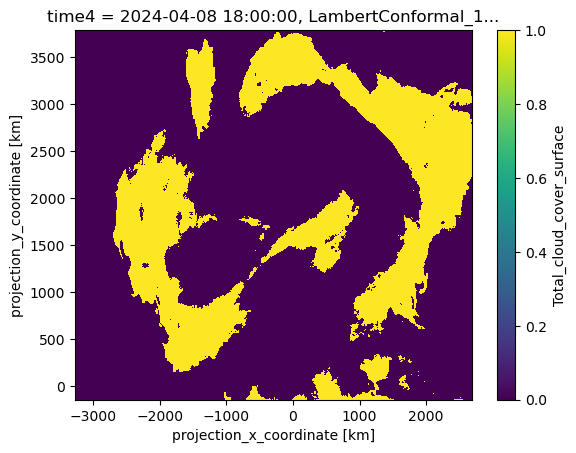

In [14]:
mask.plot()

In [15]:
import pprint

In [16]:
import rasterio

In [17]:
src = rasterio.open("National_Blend_CONUS_2024_04_08.gib2.nc4")

In [18]:
src.crs

CRS.from_wkt('PROJCS["unnamed",GEOGCS["unknown",DATUM["unnamed",SPHEROID["Sphere",6371200,0]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Lambert_Conformal_Conic_1SP"],PARAMETER["latitude_of_origin",25],PARAMETER["central_meridian",265],PARAMETER["scale_factor",1],PARAMETER["false_easting",0],PARAMETER["false_northing",0],PARAMETER["standard_parallel_1",25],UNIT["kilometre",1000,AUTHORITY["EPSG","9036"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]')

In [19]:
src.read(1)

array([[62., 62., 63., ..., 90., 89., 89.],
       [62., 62., 62., ..., 89., 89., 89.],
       [62., 62., 62., ..., 89., 89., 89.],
       ...,
       [76., 76., 76., ..., 27., 27., 27.],
       [76., 76., 76., ..., 27., 27., 27.],
       [76., 76., 75., ..., 27., 26., 26.]], dtype=float32)

In [20]:
tcc = src.read(1)

In [21]:
mask = tcc <= 25

In [22]:
mask

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [23]:
goodornot = mask * 1

In [24]:
goodornot.dtype

dtype('int64')

In [25]:
goodornot

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [26]:
shapes = features.shapes(goodornot.astype('uint8'),mask,transform=src.transform)

In [27]:
import geopandas as gpd

In [28]:
fc = [{"geometry": shape, "properties": {"value": value}} for shape, value in shapes]

In [29]:
fc

[{'geometry': {'type': 'Polygon',
   'coordinates': [[(1349.8366900759752, 3790.842117038675),
     (1349.8366900759752, 3770.5244944198735),
     (1352.3763930284936, 3770.5244944198735),
     (1352.3763930284936, 3767.9847915925234),
     (1362.535204838567, 3767.9847915925234),
     (1362.535204838567, 3770.5244944198735),
     (1367.6146107436039, 3770.5244944198735),
     (1367.6146107436039, 3773.064197247224),
     (1377.7734225536774, 3773.064197247224),
     (1377.7734225536774, 3775.603900074574),
     (1380.3131255061958, 3775.603900074574),
     (1380.3131255061958, 3790.842117038675),
     (1349.8366900759752, 3790.842117038675)]]},
  'properties': {'value': 1.0}},
 {'geometry': {'type': 'Polygon',
   'coordinates': [[(-1608.9172496079584, 3552.110051267758),
     (-1603.8378437029216, 3552.110051267758),
     (-1603.8378437029216, 3549.570348440408),
     (-1598.7584377978849, 3549.570348440408),
     (-1598.7584377978849, 3552.110051267758),
     (-1593.6790318928481, 35

In [30]:
gshapes = gpd.GeoDataFrame.from_features(fc)

In [31]:
gshapes.crs = src.crs

In [32]:
gshapes.crs.to_wkt()

'PROJCRS["unnamed",BASEGEOGCRS["unknown",DATUM["unnamed",ELLIPSOID["Sphere",6371200,0,LENGTHUNIT["metre",1,ID["EPSG",9001]]]],PRIMEM["Greenwich",0,ANGLEUNIT["degree",0.0174532925199433,ID["EPSG",9122]]]],CONVERSION["unnamed",METHOD["Lambert Conic Conformal (1SP)",ID["EPSG",9801]],PARAMETER["Latitude of natural origin",25,ANGLEUNIT["degree",0.0174532925199433],ID["EPSG",8801]],PARAMETER["Longitude of natural origin",265,ANGLEUNIT["degree",0.0174532925199433],ID["EPSG",8802]],PARAMETER["Scale factor at natural origin",1,SCALEUNIT["unity",1],ID["EPSG",8805]],PARAMETER["False easting",0,LENGTHUNIT["kilometre",1000],ID["EPSG",8806]],PARAMETER["False northing",0,LENGTHUNIT["kilometre",1000],ID["EPSG",8807]],PARAMETER["standard_parallel_1",25,ANGLEUNIT["degree",0.0174532925199433,ID["EPSG",9122]]]],CS[Cartesian,2],AXIS["easting",east,ORDER[1],LENGTHUNIT["kilometre",1000,ID["EPSG",9036]]],AXIS["northing",north,ORDER[2],LENGTHUNIT["kilometre",1000,ID["EPSG",9036]]]]'

In [33]:
gshapes.to_crs(4326)

,geometry,value
0,"POLYGON ((-76.57722 56.40973, -76.61460 56.258...",1.0
1,"POLYGON ((-116.39386 54.31941, -116.32743 54.3...",1.0
2,"POLYGON ((-83.84236 53.57706, -83.84510 53.557...",1.0
3,"POLYGON ((-77.71357 53.25219, -77.68065 53.249...",1.0
4,"POLYGON ((-93.23689 52.69089, -93.23732 52.670...",1.0
...,...,...
440,"POLYGON ((-74.16778 22.30258, -74.11905 22.295...",1.0
441,"POLYGON ((-71.96438 21.92317, -71.89169 21.911...",1.0
442,"POLYGON ((-70.60763 21.83964, -70.58346 21.835...",1.0
443,"POLYGON ((-70.34877 21.63340, -70.35321 21.610...",1.0


In [34]:
gshapes.to_file('goodsky.shp')

In [35]:
gshapes.to_file('goodsky.gpkg', driver='GPKG', layer='goodsky')